# Import necessory libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl

# Data Generation

#### y =  15 * sin( x ) + 3

x = 100 values in the range [0,11)



(-20.0, 20.0)

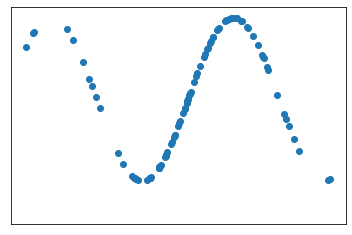

In [2]:
np.random.seed(seed=9)

# no. of data points
n_points = 100

# data point generation
x = np.random.normal(0, 2, n_points) ## normal distribution
# sorting points
x = np.sort(x)

y = 15*np.sin(x) + 3 

#visualize data

plt.scatter(x, y)
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Underfit Model

## Theta values

In [4]:
# polynomial of degree 1 was used which is a linear model using polyfit function

underfit = np.polyfit(x_train, y_train, 1)
underfit

array([0.68813861, 2.60412531])

(-20.0, 20.0)

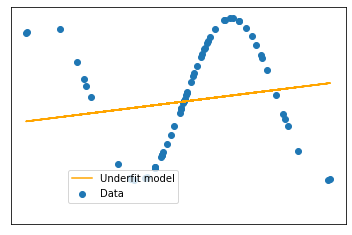

In [5]:
# visualize model
plt.scatter(x_train, y_train, label='Data')
plt.plot(x_train, np.polyval(underfit, x_train), label='Underfit model',color='orange')

plt.legend(loc=[0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])

# Overfit Model

## Theta Values

In [6]:
# polynomial of degree 15 was used to fit training data using polyfit function

overfit = np.polyfit(x_train, y_train, 15)
overfit

array([-7.93116218e-12, -7.37589630e-13,  2.27529625e-09,  5.33181297e-11,
       -3.73101048e-07, -1.45076602e-09,  4.13059545e-05,  1.86127924e-08,
       -2.97600603e-03, -1.14217683e-07,  1.24999426e-01,  2.95982388e-07,
       -2.49999923e+00, -2.46485042e-07,  1.49999997e+01,  3.00000003e+00])

(-20.0, 20.0)

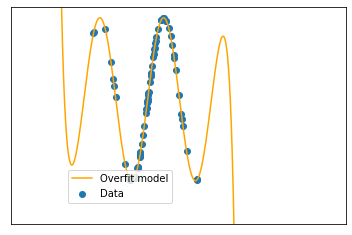

In [7]:
# visualize model
plt.scatter(x_train, y_train, label='Data')
curve_x = np.linspace(-12,18,333)
plt.plot(curve_x, np.polyval(overfit, curve_x),label='Overfit model', color='orange')

plt.legend(loc=[0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])

# Regularization using Ridge 

In [8]:
# feature generation using PolynomialFeatures for polynomial of degree 15

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15, include_bias=False)
poly_features = poly.fit_transform(x_train.reshape(-1, 1))
poly_features.shape

(70, 15)

## Using Ridge regression

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.0000001, fit_intercept=True, normalize=True,copy_X=True, max_iter=None, tol=0.001,random_state=1)

# fitting training data
ridge.fit(poly_features, y_train)

Ridge(alpha=1e-07, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=1, solver='auto', tol=0.001)

## Ridge coefficients

In [10]:
ridge.coef_

array([ 1.49654591e+01, -4.93526935e-03, -2.46108334e+00,  2.04239463e-03,
        1.13151413e-01, -1.60564476e-04, -1.55034884e-03, -2.70691283e-06,
       -3.14759986e-05,  3.67911432e-07,  7.03098426e-07,  6.26218908e-09,
        2.85324579e-08, -4.30281810e-10, -7.14720117e-10])

## Predict for Ridge 

In [11]:
# prediction for test data
poly_features_curve = poly.fit_transform(curve_x.reshape(-1, 1))
y_pred = ridge.predict(poly_features_curve)

(-20.0, 20.0)

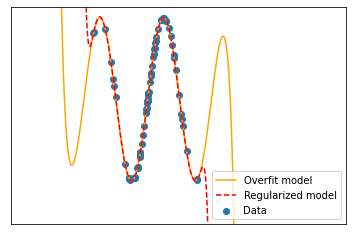

In [12]:
# visualize model
plt.scatter(x_train, y_train, label='Data')

plt.plot(curve_x, np.polyval(overfit, curve_x),label='Overfit model', color='orange')

plt.plot(curve_x, y_pred,label='Regularized model',color='red', linestyle='--')
loc=[0.17, 0.1]
plt.legend()
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])

# Performance

## Root Mean Square Error Calculation Function

In [13]:
RMSE = lambda y, y_pred: np.sqrt(np.mean((y-y_pred)**2))

# Underfit Model

## Training Error

In [14]:
y_train_pred = np.polyval(underfit, x_train)
RMSE(y_train, y_train_pred)

10.04090916774393

## Testing Error

In [15]:
y_test_pred = np.polyval(underfit, x_test)
RMSE(y_test, y_test_pred)

10.474762090230623

# Overfit Model

## Training Error

In [16]:
y_train_pred = np.polyval(overfit, x_train)
RMSE(y_train, y_train_pred)

7.783592294736584e-08

## Test Error

In [17]:
y_test_pred = np.polyval(overfit, x_test)
RMSE(y_test, y_test_pred)

3.182190585239643e-05

# Regularized Model

## Training Error

In [18]:
y_train_pred = ridge.predict(poly_features)

RMSE(y_train, y_train_pred)

0.009849682518646576

## Test Error

In [19]:
poly_features_test = poly.fit_transform(x_test.reshape(-1, 1))

y_test_pred = ridge.predict(poly_features_test)

RMSE(y_test, y_test_pred)

0.08981219836357121

In all cases Underfit, Overfit and Regularized model the RMSE score in Normal Distribution is less than Uniform Distribution.

## Exercise 2

 1. **np.random.normal(loc=0,scale=1,size=50)**

Normal Distribution

--> mean(loc) is 0

--> standard deviation (scale) is 1
 
--> Array of 50 points

2. **Alpha in ridge regression is the regularization strength.**

--> If value of alpha increases, the model complexity reduces and it will help in reducing overfitting.

--> If values of alpha decreases, the model complexity increases and it will be difficult to handle overfitting.

3. **How we can detect underfitting and overfitting? Methods to overcome Underfitting and overfitting.**

--> Model with high bias tends to underfit

--> Model with high variance tends to overfit

--> By increasing the dataset size to solve the problem of underfitting

--> We can use regularization to solve the problem of overfitting.


4. **np.reshape(-1,1)**

  We get a new shape to an array without changing its data. Here the tuple indicates (-1,1) that no. of rows is unknown but no. of columns is 1. Therefore, a shape of (12,) would be converted to (12,1) or a shape of (3,4) is converted to (12,1). While number of elements would remain constant.